<div>
<img src="https://nci.org.au/sites/default/files/logos/Logo-NCI.svg" width="300" align="left"/>
</div>

## Requesting ASTER map images through NCI's GSKY Data Server
NCI's GSKY Data Server supports the Open Geospatial Consortium (OGC) Web Map Service (WMS), which is a standard protocol for serving geospatial data as images (e.g., PNG).   


**Constructing WMS Requests**

To request a spatial subset of data through GSKY using WMS, a **GetMap** URL defining the subset has to be constructed. This URL can be used within a web browser to communicate to the GSKY Data Server, which will return the requested map image of the subset. 

`http://gsky.nci.org.au/ows/aster`?
<br>
`service =` WMS
<br>
`&version =` 1.3.0
<br>
`&request =` GetMap
<br>
`&layers =` value 
<br>
`&crs =` value
<br>
`&styles =`value
<br>
`&format =`value
<br>
`&bbox =`value
<br>
`&width =`value
<br>
`&height =`value
<br>
`&colourscalerange =`value
<br>
`&transparent =`value
<br>
`&time =`value
<br>

**GetMap parameters:**

|Parameter    |  Required/Optional  |  Input                                                            |
|-------------|:-------------------:|------------------                                                 |
|service      |     Required        |      WMS                                                          |
|version      |     Required        |  `1.1.1**`, `1.3.0 (default)`                                     |
|request      |     Required        | `GetMap`                                                          |
|layers       |     Required        | `<variable>`                                                      |
|crs          |     Required        | `<crs_value>`                                                     |
|styles       |     Required        | `<style_name>`                                                    |
|format       |     Required        | `image/png `, `image/png;mode=32bit `, `image/gif `, `image/jpeg `|
|bbox         |     Required        | `<ymin,xmin,ymax,xmax>`                                           |
|width        |     Required        | Image width in pixels                                             |
|height       |     Required        | Image height in pixels                                            |
|colorscalerange |  Optional        | `<min,max>`                                                       |
|transparent  |     Optional        | True, False                                                       |
|time         |     Optional        | `<time_value>`                                                    |





`**`**Syntax differences for v1.1.1 GetMap requests:**
- Use `srs` in place of `crs`
- The order of `bbox` values is: `<xmin,ymin,xmax,ymax>`


<br>

**WMS GetCapabilities Request**

In order to contruct the **GetMap** URL, a **GetCapabilities** request can be made to the server. This requests returns an xml describing the available WMS parameters (metadata, services, and data) made available by NCI's GSKY server. 

**GetCapabilities example:**

> [http://gsky.nci.org.au/ows/aster?service=WMS&version=1.3.0&request=GetCapabilities<br/>](http://gsky.nci.org.au/ows/aster?service=WMS&version=1.3.0&request=GetCapabilities)


**GetMap Request**

Using the information returned from a GetCapabilities request, a GetMap URL can be constructed and then entered into the address bar of any web browser.  

**Example GetMap request:**

> [http://gsky.nci.org.au/ows/aster?<br/>
service=WMS&<br/>
layers=Ferrous_Iron_Index&<br/>
service=WMS&<br/>
crs=EPSG:4326&<br/>
format=image/png&<br/>
request=GetMap&<br/>
height=512&<br/>
width=512&<br/>
version=1.3.0&<br/>
bbox=-47,113,-11,153&<br/>
time=2012-06-01T00:00:00.000Z&<br/>
transparent=FALSE
](http://gsky.nci.org.au/ows/aster?SERVICE=WMS&&layers=Ferrous_Iron_Index&styles=aster&service=WMS&crs=EPSG%3A4326&format=image%2Fpng&request=GetMap&bgcolor=0xFFFFFF&height=512&width=512&version=1.3.0&bbox=-47,113,-11,153&time=2012-06-01T00:00:00.000Z)




### Using GSKY's WMS in Python
Many tools are available to perform the above steps less manually. In particular, Python's OWSLib library can be used with GSKY's WMS. 

**The following libraries will need to be imported for the below example.** 

In [1]:
from owslib.wms import WebMapService
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

**To start, we will need the base GSKY server URL:**

In [2]:
gsky_url = 'http://gsky.nci.org.au/ows/aster'

**Now using OWSLib, you can begin by inspecting the service metadata:**

In [3]:
wms = WebMapService(gsky_url, version='1.3.0')

**Find out the available data layers that can be requested:**

In [4]:
for layer in list(wms.contents):
    print("Layer Name:", wms[layer].name)
    print("Title:", wms[layer].title, '\n')

Layer Name: AlOH_Group_Composition
Title: ASTER Map AlOH Group Composition 

Layer Name: AlOH_Group_Content
Title: ASTER Map AlOH Group Content 

Layer Name: FeOH_Group_Content
Title: ASTER Map FeOH Group Content 

Layer Name: Ferric_Oxide_Composition
Title: ASTER Map Ferric Oxide Composition 

Layer Name: Ferric_Oxide_Content
Title: ASTER Map Ferric Oxide Content 

Layer Name: Ferrous_Iron_in_MgOH
Title: ASTER Map Ferrous Iron Content in MgOH/carbonate 

Layer Name: Ferrous_Iron_Index
Title: ASTER Map Ferrous Iron Index 

Layer Name: Green_Vegetation_Content
Title: ASTER Map Green Vegetation Content 

Layer Name: Kaolin_Group_Index
Title: ASTER Map Kaolin Group Index 

Layer Name: MgOH_Group_Composition
Title: ASTER Map MgOH Group Composition 

Layer Name: MgOH_Group_Content
Title: ASTER Map MgOH Group Content 

Layer Name: Opaque_Index
Title: ASTER Map Opaque Index 

Layer Name: Quartz_Index
Title: ASTER Map TIR Quartz Index 

Layer Name: Silica_Index
Title: ASTER Map TIR Silica Inde

**We can also view metadata that is available about a selected layer. For example, you can view the abstract associated with that data layer.**

In [5]:
layer = "Silica_Index"

In [6]:
print(wms[layer].abstract)

1. Band ratio: B13/B10 Blue is low silica content Red is high silica content (potentially includes Si-rich minerals, such as quartz, feldspars, Al-clays)

Geoscience Applications: Broadly equates to the silica content though the intensity (depth) of this reststrahlen feature is also affected by particle size less than 250 micron. Useful product for mapping: (1) colluvial/alluvial materials; (2) silica-rich (quartz) sediments (e.g. quartzites); (3) silification and silcretes; and (4) quartz veins. Use in combination with quartz index, which is often correlated with the Silica index.

NCI Data Catalogue: http://dx.doi.org/10.25914/5f224f299e246


**Or view the CRS options, bounding box, and time positions available (these details will be needed to construct the GetMap request).** 

In [7]:
print("CRS Options: ")
crs = wms[layer].crsOptions
print('\t', crs, '\n')
    
print("Bounding Box: ")
bbox = wms[layer].boundingBox
print('\t', bbox, '\n')
    
print("Time Positions: ")
time = wms[layer].timepositions
print('\t', time[:10], '\n')

CRS Options: 
	 ['EPSG:3857', 'EPSG:4326'] 

Bounding Box: 
	 (-180.0, -90.0, 180.0, 90.0, 'EPSG:4326') 

Time Positions: 
	 ['2012-06-01T00:00:00.000Z'] 



**Now let's use the information above to construct and make the GetMap request**

**We'll need to define a bounding box for our request:**

In [8]:
subset_bbox = (113, -44, 153, -11)

**OWSLib's library can now be used to make the GetMap request:**

In [9]:
output = wms.getmap(layers=[layer],
                        srs='EPSG:4326', 
                        bbox=(subset_bbox[0], subset_bbox[1], subset_bbox[2], subset_bbox[3]),
                        size=(256, 256), 
                        format='image/png',
                        time=time[0]
                        )

**To view the above constructed URL:**

In [10]:
print(output.geturl())

http://gsky.nci.org.au/ows/aster?SERVICE=WMS&service=WMS&version=1.3.0&request=GetMap&layers=Silica_Index&styles=&width=256&height=256&crs=EPSG%3A4326&bbox=-44%2C113%2C-11%2C153&format=image%2Fpng&transparent=FALSE&bgcolor=0xFFFFFF&exceptions=XML&time=2012-06-01T00%3A00%3A00.000Z


**Lastly, we need to write the GetMap result to a file:**

In [11]:
pngfile = './gsky_getMap.png'
with open(pngfile, 'wb') as out:
    out.write(output.read())

**And if we'd like to confirm the result:**

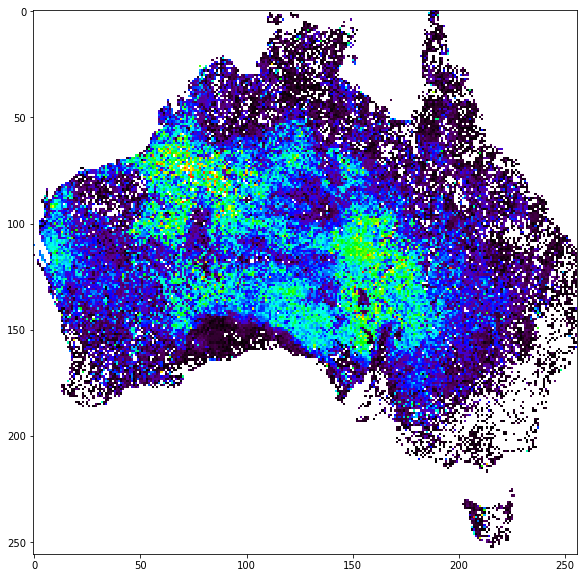

In [12]:
im = Image.open(pngfile)
plt.figure(figsize=(10, 10))
plt.imshow(im)

<br>


--------
**For more information on the OGC WMS standard specifications and the Python OWSLib package:** <br/>
http://www.opengeospatial.org/standards/wms <br/>

https://geopython.github.io/OWSLib/#wms <br/>
